In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# link
#dùng pathlib để quản lý đường dẫn
project_root = os.path.dirname(os.getcwd())
raw_data_folder = os.path.join(project_root, 'data', 'bts_raw')
processed_data_folder = os.path.join(project_root, 'data', 'bts_processed')

if not os.path.exists(processed_data_folder):
    os.makedirs(processed_data_folder)

print('Thư mục dữ liệu thô:', raw_data_folder)
print('Thư mục dữ liệu thô đã qua xử lý', processed_data_folder)

Thư mục dữ liệu thô: C:\Users\hoiti\PycharmProjects\flight_delay_bts_project\data\bts_raw
Thư mục dữ liệu thô đã qua xử lý C:\Users\hoiti\PycharmProjects\flight_delay_bts_project\data\bts_processed


In [2]:
def load_and_combine_csvs(folder_path, file_pattern):
    csv_files = glob.glob(os.path.join(folder_path, file_pattern))

    if not csv_files:
        print("Không tìm thấy file CSV nào với pattern:", file_pattern, "trong:", folder_path)
        return None # Trả về None nếu không có file

    all_dataframes = []
    print("Các file sẽ được load:", [os.path.basename(f) for f in csv_files])
    for file_p in csv_files:
        print("Đang đọc:", os.path.basename(file_p))
        try:
            df_month = pd.read_csv(file_p, low_memory=False)
            all_dataframes.append(df_month)
        except Exception as e:
            print("Lỗi khi đọc file", os.path.basename(file_p), ":", e)

    if not all_dataframes:
        print("Không load được dữ liệu từ file nào.")
        return None

    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print("Đã gộp xong. Tổng số dòng:", len(combined_df), ", Tổng số cột:", len(combined_df.columns))
    return combined_df

# Sử dụng hàm để load dữ liệu BTS
raw_bts_df = load_and_combine_csvs(raw_data_folder, "Airline_Delay_Cause_2024_*.csv")

if raw_bts_df is not None:
    print("\n--- Dữ liệu thô (5 dòng đầu) ---")
    display(raw_bts_df.head())
    print("\n--- Thông tin chung về dữ liệu thô ---")
    raw_bts_df.info(show_counts=True)

Các file sẽ được load: ['Airline_Delay_Cause_2024_10.csv', 'Airline_Delay_Cause_2024_11.csv', 'Airline_Delay_Cause_2024_12.csv']
Đang đọc: Airline_Delay_Cause_2024_10.csv
Đang đọc: Airline_Delay_Cause_2024_11.csv
Đang đọc: Airline_Delay_Cause_2024_12.csv
Đã gộp xong. Tổng số dòng: 5680 , Tổng số cột: 21

--- Dữ liệu thô (5 dòng đầu) ---


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,10,OH,PSA Airlines Inc.,SGF,"Springfield, MO: Springfield-Branson National",119.0,16.0,5.50,0.0,...,0.0,6.90,0.0,0.0,1575.0,716.0,0.0,111.0,0.0,748.0
1,2024,10,OH,PSA Airlines Inc.,SHV,"Shreveport, LA: Shreveport Regional",92.0,12.0,4.56,0.0,...,0.0,1.52,0.0,0.0,372.0,174.0,0.0,166.0,0.0,32.0
2,2024,10,OH,PSA Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,3.0,0.40,0.0,...,0.0,2.57,7.0,0.0,86.0,9.0,0.0,1.0,0.0,76.0
3,2024,10,OH,PSA Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",115.0,15.0,6.87,0.0,...,0.0,7.79,0.0,0.0,1186.0,351.0,0.0,7.0,0.0,828.0
4,2024,10,OH,PSA Airlines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",15.0,4.0,1.42,0.0,...,0.0,1.53,0.0,0.0,162.0,62.0,0.0,27.0,0.0,73.0



--- Thông tin chung về dữ liệu thô ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5680 entries, 0 to 5679
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 5680 non-null   int64  
 1   month                5680 non-null   int64  
 2   carrier              5680 non-null   object 
 3   carrier_name         5680 non-null   object 
 4   airport              5680 non-null   object 
 5   airport_name         5680 non-null   object 
 6   arr_flights          5677 non-null   float64
 7   arr_del15            5676 non-null   float64
 8   carrier_ct           5677 non-null   float64
 9   weather_ct           5677 non-null   float64
 10  nas_ct               5677 non-null   float64
 11  security_ct          5677 non-null   float64
 12  late_aircraft_ct     5677 non-null   float64
 13  arr_cancelled        5677 non-null   float64
 14  arr_diverted         5677 non-null   float64
 15

In [3]:
def preprocess_data(input_df):
    if input_df is None or input_df.empty:
        print('DataFrame đầu vào rỗng, không xử lý.')
        return None

    df = input_df.copy()

    if df.columns[-1].lower().startswith('unnamed'):
        df = df.iloc[:, :-1]

    col_arr_flights = 'arr_flights'
    if col_arr_flights not in df.columns:
        print('CẢNH BÁO: Thiếu cột bắt buộc \'{}\'. Dừng.'.format(col_arr_flights))
        return None
    df.dropna(subset=[col_arr_flights], inplace=True)
    df = df[df[col_arr_flights] > 0]
    if df.empty: # Nếu sau khi lọc arr_flights, df rỗng
        print('CẢNH BÁO: Không còn dữ liệu hợp lệ sau khi xử lý \'{}\'.'.format(col_arr_flights))
        return None

    col_arr_del15 = 'arr_del15'
    if col_arr_del15 not in df.columns:
        print('CẢNH BÁO: Thiếu cột bắt buộc \'{}\'. Dừng.'.format(col_arr_del15))
        return None
    df[col_arr_del15] = df[col_arr_del15].fillna(0)
    df['delay_rate'] = df[col_arr_del15] / df[col_arr_flights]
    df['delay_rate'] = np.clip(df['delay_rate'], 0, 1)

    delay_detail_cols = [
        'carrier_delay', 'weather_delay', 'nas_delay',
        'security_delay', 'late_aircraft_delay',
        'carrier_ct', 'weather_ct', 'nas_ct',
        'security_ct', 'late_aircraft_ct', 'arr_delay'
    ]
    for col_name in delay_detail_cols:
        if col_name in df.columns:
            df[col_name] = df[col_name].fillna(0)
    return df

# Áp dụng hàm tiền xử lý
processed_df = None # Khởi tạo
if 'raw_bts_df' in locals() and raw_bts_df is not None:
    print('\n--- Bắt đầu tiền xử lý dữ liệu thô ---')
    processed_df = preprocess_data(raw_bts_df)

    if processed_df is not None and not processed_df.empty:
        print('\n--- Dữ liệu sau tiền xử lý (5 dòng đầu) ---')
        display(processed_df.head())
        print('\n--- Số NaN còn lại sau tiền xử lý (nếu có) ---')
        nan_counts_after_processing = processed_df.isnull().sum()
        nan_counts_to_display = nan_counts_after_processing[nan_counts_after_processing > 0].sort_values(ascending=False)
        if not nan_counts_to_display.empty:
             display(nan_counts_to_display.head(5))
        else:
             print('Không còn giá trị NaN nào đáng kể.')
    else:
        print('\nTiền xử lý không thành công hoặc không có dữ liệu sau xử lý (processed_df is None hoặc rỗng).')
        processed_df = None # Đảm bảo là None nếu xử lý không thành công
else:
    print('\n\'raw_bts_df\' không tồn tại hoặc rỗng. Bỏ qua tiền xử lý.')
    processed_df = None # Đảm bảo là None nếu không có dữ liệu thô


--- Bắt đầu tiền xử lý dữ liệu thô ---

--- Dữ liệu sau tiền xử lý (5 dòng đầu) ---


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate
0,2024,10,OH,PSA Airlines Inc.,SGF,"Springfield, MO: Springfield-Branson National",119.0,16.0,5.50,0.0,...,6.90,0.0,0.0,1575.0,716.0,0.0,111.0,0.0,748.0,0.134454
1,2024,10,OH,PSA Airlines Inc.,SHV,"Shreveport, LA: Shreveport Regional",92.0,12.0,4.56,0.0,...,1.52,0.0,0.0,372.0,174.0,0.0,166.0,0.0,32.0,0.130435
2,2024,10,OH,PSA Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",31.0,3.0,0.40,0.0,...,2.57,7.0,0.0,86.0,9.0,0.0,1.0,0.0,76.0,0.096774
3,2024,10,OH,PSA Airlines Inc.,STL,"St. Louis, MO: St Louis Lambert International",115.0,15.0,6.87,0.0,...,7.79,0.0,0.0,1186.0,351.0,0.0,7.0,0.0,828.0,0.130435
4,2024,10,OH,PSA Airlines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",15.0,4.0,1.42,0.0,...,1.53,0.0,0.0,162.0,62.0,0.0,27.0,0.0,73.0,0.266667



--- Số NaN còn lại sau tiền xử lý (nếu có) ---
Không còn giá trị NaN nào đáng kể.


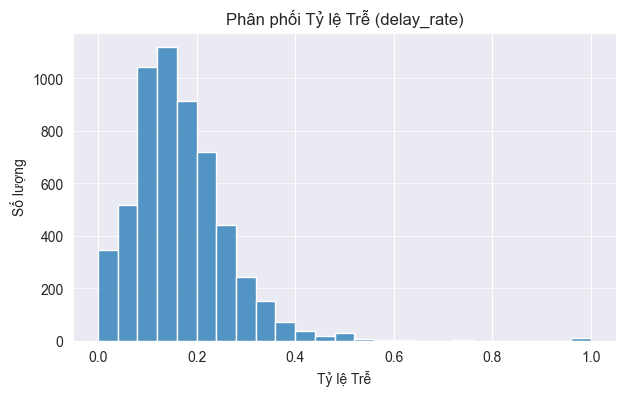


Các cột được chọn để giữ lại: ['airport', 'arr_cancelled', 'arr_diverted', 'arr_flights', 'carrier', 'carrier_ct', 'delay_rate', 'late_aircraft_ct', 'month', 'nas_ct', 'security_ct', 'weather_ct', 'year']

--- Dữ liệu đã chọn cột (5 dòng đầu) ---


,airport,arr_cancelled,arr_diverted,arr_flights,carrier,carrier_ct,delay_rate,late_aircraft_ct,month,nas_ct,security_ct,weather_ct,year
0,SGF,0.0,0.0,119.0,OH,5.50,0.134454,6.90,10,3.60,0.0,0.0,2024
1,SHV,0.0,0.0,92.0,OH,4.56,0.130435,1.52,10,5.92,0.0,0.0,2024
2,SRQ,7.0,0.0,31.0,OH,0.40,0.096774,2.57,10,0.03,0.0,0.0,2024
3,STL,0.0,0.0,115.0,OH,6.87,0.130435,7.79,10,0.33,0.0,0.0,2024
4,SYR,0.0,0.0,15.0,OH,1.42,0.266667,1.53,10,1.06,0.0,0.0,2024


Kích thước dữ liệu cuối cùng: (5677, 13)


In [4]:
final_selected_df = None # Khởi tạo

if ('processed_df' in locals() and
    processed_df is not None and not processed_df.empty and
    'delay_rate' in processed_df.columns):

    # print('\n--- Phân phối của \'delay_rate\' ---')
    plt.figure(figsize=(7, 4))
    sns.histplot(processed_df['delay_rate'], bins=25, kde=False)
    plt.title('Phân phối Tỷ lệ Trễ (delay_rate)')
    plt.xlabel('Tỷ lệ Trễ')
    plt.ylabel('Số lượng')
    plt.grid(axis='y', alpha=0.7)
    plt.show()

    identifier_cols = ['year', 'month', 'carrier', 'airport']
    numeric_cols = [
        'arr_flights', 'arr_cancelled', 'arr_diverted',
        'carrier_ct', 'weather_ct', 'nas_ct',
        'security_ct', 'late_aircraft_ct'
    ]
    target_col = ['delay_rate']

    # Lọc ra các cột thực sự tồn tại trong processed_df
    cols_to_check = identifier_cols + numeric_cols + target_col
    final_cols_to_use = [col for col in cols_to_check if col in processed_df.columns]
    final_cols_to_use = sorted(list(set(final_cols_to_use)))

    if not final_cols_to_use or 'delay_rate' not in final_cols_to_use:
        print('CẢNH BÁO: Không đủ cột cần thiết hoặc thiếu \'delay_rate\' sau khi lọc. Không thể tạo final_selected_df.')
    else:
        print('\nCác cột được chọn để giữ lại:', final_cols_to_use)
        final_selected_df = processed_df[final_cols_to_use].copy()

        print('\n--- Dữ liệu đã chọn cột (5 dòng đầu) ---')
        display(final_selected_df.head())
        print('Kích thước dữ liệu cuối cùng:', final_selected_df.shape)
else:
    print('\nKhông thể vẽ đồ thị hoặc chọn cột (\'processed_df\' không sẵn sàng, rỗng hoặc thiếu \'delay_rate\').')

In [5]:
#Lưu dữ liệu đã xử lý
if ('final_selected_df' in locals() and
    final_selected_df is not None and
    not final_selected_df.empty):

    #output
    output_filename = 'flight_delay_2024_preprocessed.csv'

    full_path_to_output_file = os.path.join(processed_data_folder, output_filename)

    try:
        final_selected_df.to_csv(full_path_to_output_file, index=False)
        print('\nĐã lưu dữ liệu đã tiền xử lý và chọn cột vào file:')
        print(full_path_to_output_file)
    except Exception as e:
        print('\nLỗi khi lưu file CSV: {}'.format(e))
else:
    print('\nKhông có dữ liệu \'final_selected_df\' để lưu (có thể là None, rỗng, hoặc chưa được tạo).')

    print('-' * 10)


Đã lưu dữ liệu đã tiền xử lý và chọn cột vào file:
C:\Users\hoiti\PycharmProjects\flight_delay_bts_project\data\bts_processed\flight_delay_2024_preprocessed.csv
